# **Chicago Taxi Ride Analysis**

This project analyzes taxi ride data in Chicago to uncover insights into company performance, passenger demand by neighborhood, and the impact of weather on trip duration. The work combines SQL queries to extract and aggregate data with Python (Pandas, Matplotlib, SciPy) for data analysis, visualization, and hypothesis testing.

The project is divided into several stages:

**Data Extraction (SQL):** Retrieved company-level ride counts and neighborhood-level trip distributions from the database.

**Data Preparation & Exploration (Python):** 
- Imported multiple CSV datasets containing company names, trip counts, neighborhood drop-off locations, and weather conditions.
- Cleaned and validated data types, ensuring consistency across datasets.
- Identified the top 10 taxi companies and the top 10 neighborhoods by average number of completed trips.

**Visualization & Insights:**

- Bar charts comparing taxi companies by ride volume.
- Ranked list and visualization of Chicago neighborhoods with the highest trip completions.
- Interpretation of results to highlight market concentration and spatial demand patterns.

**Hypothesis Testing:**

- Evaluated the hypothesis: “The average duration of trips from the Loop to O’Hare International Airport changes on rainy Saturdays.”
- Formulated null and alternative hypotheses, defined the significance level (α), and applied appropriate statistical tests.
- Interpreted results to assess whether weather significantly affects ride duration.

**Skills demonstrated:**

- SQL for data retrieval and aggregation in a previous analysis
- Python (Pandas, Matplotlib, SciPy) for cleaning, analysis, visualization, and hypothesis testing
- Business insights for transportation demand and performance evaluation
- This project showcases the integration of SQL and Python in a real-world data analysis workflow, from raw data extraction to actionable insights.

-----

In [1]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
#Create trips df from csv file
trips = pd.read_csv("moved_project_sql_result_01.csv")
trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [3]:
#Create dropoff df from csv file
dropoff = pd.read_csv("moved_project_sql_result_04.csv")
dropoff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


I don't think the data types in any of the files should be changed.
For SQL Results 01, I find it appropriate to use integer data types for the "trips" amount column since they don't require a decimal point per se.
For SQL Results 04, I find it appropriate to use float data types because of the aggregation type, which is an average.

In [4]:
#Sort 'average_trips' and find neighborhoods with most trips
top_dropoff_loc = dropoff.sort_values("average_trips", ascending = False)
#Create a df with the top 10 of neighborhoods with most trips
top_10_dropoff = top_dropoff_loc.head(10)
print(top_10_dropoff)

  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


In [5]:
#Filter companies with more than 500 trips
most_trips = trips[(trips["trips_amount"] > 500)]
print(most_trips)

                            company_name  trips_amount
0                              Flash Cab         19558
1              Taxi Affiliation Services         11422
2                       Medallion Leasin         10367
3                             Yellow Cab          9888
4        Taxi Affiliation Service Yellow          9299
5              Chicago Carriage Cab Corp          9181
6                           City Service          8448
7                               Sun Taxi          7701
8              Star North Management LLC          7455
9      Blue Ribbon Taxi Association Inc.          5953
10               Choice Taxi Association          5015
11                            Globe Taxi          4383
12             Dispatch Taxi Affiliation          3355
13             Nova Taxi Affiliation Llc          3175
14  Patriot Taxi Dba Peace Taxi Associat          2235
15              Checker Taxi Affiliation          2216
16                          Blue Diamond          2070
17        

This filtering was performed to better observe the bar graph presented below: number of trips per company

<Axes: title={'center': 'Trips Amount by Company'}, xlabel='Company', ylabel='Trips Amount'>

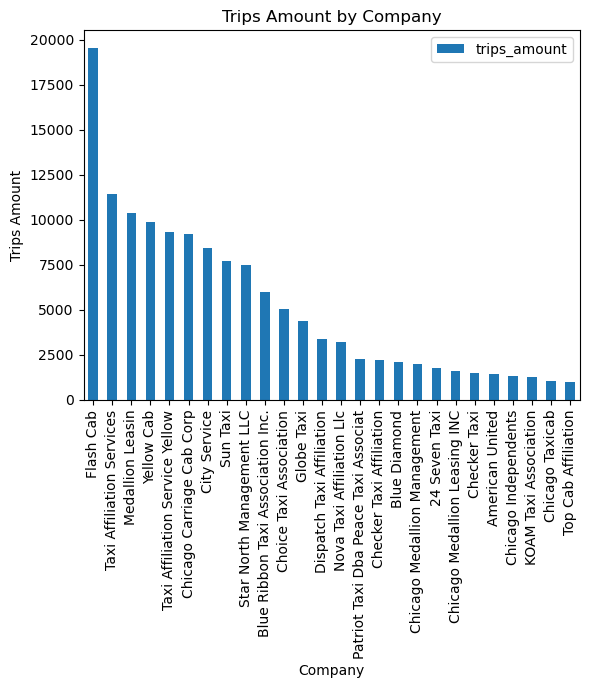

In [6]:
#Plot companies sorted by trips
most_trips.plot(kind = "bar", x = "company_name", y = "trips_amount", xlabel = "Company", ylabel = "Trips Amount", title = "Trips Amount by Company")

The graph shows that Flash Cab is the undisputed leader among transportation companies, with nearly 20,000 trips made in November. Taxi Affiliation Services is the only company behind, which operated less than two-thirds of Flash Cab's total during the same period. After Flash Cab, all other companies have a similar market share, which is gradually decreasing.

<Axes: title={'center': 'Average Trips by Dropoff Location'}, xlabel='Dropoff Location', ylabel='Average Trips'>

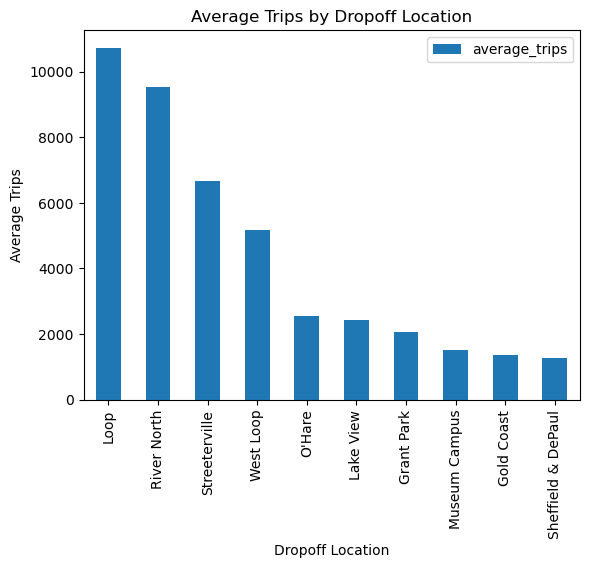

In [7]:
#Plot the top 10 neighborhoods with more dropoffs
top_10_dropoff.plot(kind = "bar", x = "dropoff_location_name", y = "average_trips", title = "Average Trips by Dropoff Location", xlabel = "Dropoff Location", ylabel = "Average Trips")

The Loop and River North are the neighborhoods with the most ridership, while the least crowded neighborhoods are Gold Coast and Sheffield & DePaul. This could mean that the Loop and River North are neighborhoods with high population density or some kind of special offer, whether cultural, culinary, or nightlife, while the Gold Coast and Sheffield & DePaul may be neighborhoods with lower population density or less attractive features.

In [8]:
#Create loop_ohare df from csv file
loop_ohare = pd.read_csv("moved_project_sql_result_07.csv")
#Check df
loop_ohare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [9]:
#Show df
loop_ohare.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


In [10]:
#Filter by weather
good_weather = loop_ohare[(loop_ohare["weather_conditions"] == "Good")]
bad_weather = loop_ohare[(loop_ohare["weather_conditions"] == "Bad")]
#Only get trip duration
good_trips = good_weather["duration_seconds"]
bad_trips = bad_weather["duration_seconds"]
#Obtener la media y la varianza de la duración de los viajes
good_mean = good_weather["duration_seconds"].mean()
good_var = good_weather["duration_seconds"].var()
bad_mean = bad_weather["duration_seconds"].mean()
bad_var = bad_weather["duration_seconds"].var()

print("Good weather trips mean: ", good_mean)
print("Good weahter trips variance: ", good_var)
print("Bad weather trips mean: ", bad_mean)
print("Bad weather trips variance: ", bad_var)

Media para viajes con buen clima:  1999.6756756756756
Varianza para viajes con buen clima:  576382.0096895089
Media para viajes con mal clima:  2427.2055555555557
Varianza para viajes con mal clima:  520294.08600248274


The means and variances were obtained for the two sets of weather types.
At first glance, trips with bad weather had a higher mean than those with good weather, which could lead to a preliminary conclusion that trips from the Loop to O'Hare Airport in bad weather take longer to arrive. However, a Student's t-test must be performed to corroborate this.
Likewise, to perform the Student's t-test, a Levene's t-test must first be performed to determine whether the variances are statistically similar. At first glance, the variances for trips with both types of weather appear very similar; however, a Levene's t-test is necessary to avoid misunderstandings.

In [11]:
#Levene test done to determine if the variances are statistically similar 
stat, p_value = st.levene(good_trips, bad_trips)

alpha = 0.05

print("Valor p: ", p_value)

#H0: The variances are statistically similar
#H1: The variances are statistically different

if p_value < alpha:
    print("Null Hypothesis is rejected, the variances are different")
else:
    print("Null Hypothesis is accepted, the variances are similar")

Valor p:  0.5332038671974493
Se acepta la Hipótesis Nula, las varianzas son iguales


Después de realizar la prueba de Levene, se acepta la hipótesis nula: las varianzas son estadísticamente iguales, por lo que en la prueba de Student se utilizará el parámetro equal_var = True.

In [13]:
#Student test is done to determine if the means are statistically similar 
alpha = 0.05
#Since Levene's test determined that the variances are statistically equal, equal_var = True is used
ttest_h0 = st.ttest_ind(good_trips, bad_trips, equal_var = True)

print(ttest_h0.pvalue)

#H0: Means are statistically similar
#H1: Means are statistically different

if ttest_h0.pvalue < alpha:
    print("Null Hypothesis is rejected, means are different")
else: 
    print("Null Hypothesis is accepted, means are similar")

6.517970327099473e-12
Null Hypothesis is rejected, means are different


La prueba de Student nos indica que las medias entre los viajes desde Loop hasta el Aeropuerto de O'Hare con buen clima y con mal clima son distintas. Esto nos indica que el mal tiempo efectivamente, hace que los viajes desde el barrio de Loop hasta el Aeropuerto de O'Hare tomen más tiempo que cuando hay buen clima.